In [1]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


### Installing packages, setting up variables

In [2]:
import os
import numpy as np
import pygrib # If using EDC JupyterLab, please install pygrib first --> "pip install pygrib"
import cdsapi
import matplotlib.pyplot as plt

In [3]:
import geojson
import shapely.wkt

area = shapely.wkt.loads('POLYGON((11.9 44.45, 11.9 45.9, 13.9 45.9, 13.9 44.45, 11.9 44.45))')
gj_feat = geojson.Feature(geometry=area, properties={})

In [4]:
import shapely.geometry
import IPython.display
IPython.display.GeoJSON(gj_feat)

<IPython.display.GeoJSON object>

### API request to Copernicus Climate Data Store (downloads wind data to computer)

In [5]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'grib',
        'variable': '10m_wind_speed',
        'product_type': 'monthly_averaged_reanalysis',
        'year': [
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            45.9, 11.9, 44.45,
            13.9,
        ],
    },
    'wind_79-20_10m_nab.grib')

2021-06-29 16:22:38,727 INFO Welcome to the CDS
2021-06-29 16:22:38,728 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2021-06-29 16:22:38,773 INFO Request is completed
2021-06-29 16:22:38,774 INFO Downloading https://download-0001.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1624874729.8933766-13211-8-b2bbd4bf-ef7b-4f70-abb8-5a7ab7572f03.grib to wind_79-20_10m_nab.grib (118.1K)
2021-06-29 16:22:39,031 INFO Download rate 461.1K/s


Result(content_length=120960,content_type=application/x-grib,location=https://download-0001.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1624874729.8933766-13211-8-b2bbd4bf-ef7b-4f70-abb8-5a7ab7572f03.grib)

In [6]:
#Opening the downloaded dataset
wind_iter = pygrib.open('wind_79-20_10m_nab.grib')

In [7]:
for month in wind_iter:
    print(month)

1:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197901010000
2:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197902010000
3:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197903010000
4:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197904010000
5:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197905010000
6:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197906010000
7:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197907010000
8:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197908010000
9:10 metre wind speed:m s**-1 (avgua):regular_ll:surface:level 0:fcst time 0 hrs (avgua):from 197909010000
10:10 metre wind speed:m s**-1 (avgua

In [8]:
for attr in month.keys():
    print(attr)

globalDomain
GRIBEditionNumber
eps
offsetSection0
section0Length
totalLength
editionNumber
WMO
productionStatusOfProcessedData
section1Length
wrongPadding
table2Version
centre
centreDescription
generatingProcessIdentifier
gridDefinition
indicatorOfParameter
parameterName
parameterUnits
indicatorOfTypeOfLevel
pressureUnits
typeOfLevelECMF
typeOfLevel
level
yearOfCentury
month
day
hour
minute
second
unitOfTimeRange
P1
P2
timeRangeIndicator
numberIncludedInAverage
numberMissingFromAveragesOrAccumulations
centuryOfReferenceTimeOfData
subCentre
paramIdECMF
paramId
cfNameECMF
cfName
cfVarNameECMF
cfVarName
unitsECMF
units
nameECMF
name
decimalScaleFactor
setLocalDefinition
optimizeScaleFactor
dataDate
year
dataTime
julianDay
stepUnits
stepType
stepRange
startStep
endStep
marsParam
validityDate
validityTime
deleteLocalDefinition
localUsePresent
localDefinitionNumber
GRIBEXSection1Problem
marsClass
marsType
marsStream
experimentVersionNumber
perturbationNumber
numberOfForecastsInEnsemble
grib2

In [9]:
wind_iter.rewind()
nab_ws = []                # nab_ws = North Adriatic Basin Wind Speed

for month in wind_iter:
#     print(month.parameterName)
#     print('Date: ', month.validDate, '\n')
#     print('Latitude: \n', month.latitudes)
#     print('shape: ', month.latitudes.shape)
#     print('Longitudes: \n', month.longitudes)
#     print('shape: ', month.longitudes.shape)
#     print('\nValues shape: ', month.values.shape)
#     print('Values (m/s): \n')
#     print('____________________________________')
    avg = np.round(np.mean(month.values),3)
    nab_ws.append(avg)

nab_ws = np.array(nab_ws)
nab_ws = nab_ws.reshape(42,12)

#Extracting 2020 data
ws_2020 = nab_ws[41]
nab_ws = np.delete(nab_ws, (0), axis=0)

print('shape of 2010-2019 data: ', nab_ws.shape)

shape of 2010-2019 data:  (41, 12)


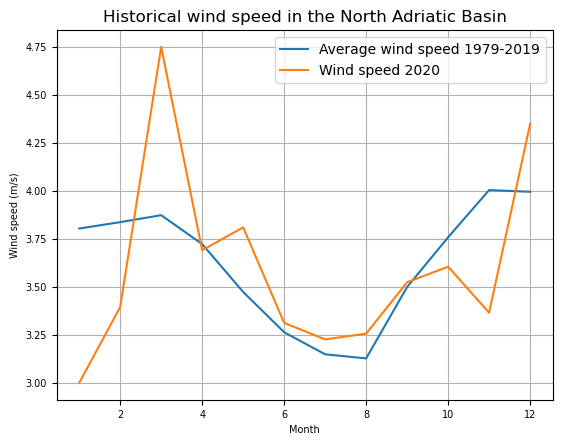

In [10]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]

# Plotting each year separately (1979-2019)
# for w_speeds in nab_ws:
#     plt.plot(months, w_speeds)
#     plt.show()

# Plotting average for all years (1979-2019)
avg_nab_ws = np.mean(nab_ws, axis=0)
plt.plot(months, avg_nab_ws, label='Average wind speed 1979-2019')
plt.plot(months, ws_2020, label='Wind speed 2020')
plt.legend()
plt.xlabel('Month', fontsize=7)
plt.ylabel('Wind speed (m/s)', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid()
plt.title('Historical wind speed in the North Adriatic Basin')
plt.show()

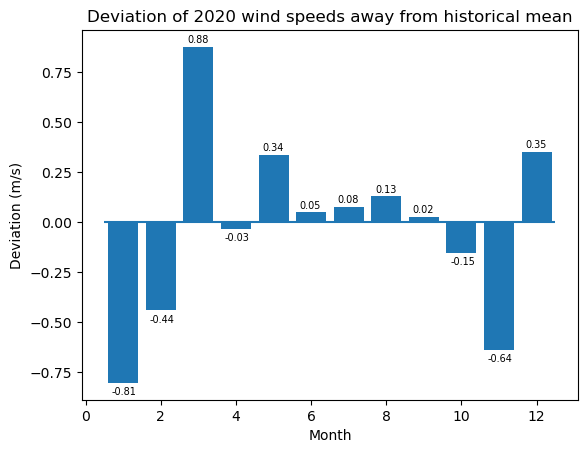

In [11]:
#Computing deviations between the two above plots
deviations = ws_2020 - avg_nab_ws
plt.bar(months, deviations)
plt.xlabel('Month')
plt.ylabel('Deviation (m/s)')
plt.title('Deviation of 2020 wind speeds away from historical mean')
plt.hlines(0, 0.5, 12.5)

for index, value in enumerate(deviations):
    if value > 0:        
        plt.text(index+0.7, value+0.02, str(np.round(value,2)), fontsize=7)
    else:
        plt.text(index+0.7, value-0.06, str(np.round(value,2)), fontsize=7)
    
plt.show()

In [13]:
# Using Max Min normalisation to place deviations on the same scale
devs_abs = abs(deviations)
norm_dev = (devs_abs-devs_abs.min())/(devs_abs.max()-devs_abs.min())

print('Normalized deviation for April: ', np.round(norm_dev[3], 3))

Normalized deviation for April:  0.008
